# Look at multitask-specific model metadata
Multitask performance metrics can be pulled from `compare_models.get_multitask_perf_from_files_new()`

## Import models and setup variables

In [32]:
from atomsci.ddm.pipeline import compare_models as cmp
import pandas as pd
import importlib

The `result_dir` and `dataset_key` must be full, **absolute** paths.

In [33]:
pred_type='classification'
MT_dataset_key='/Users/apaulson/repos/DILI/datasets/cell_health_MT.csv'

# pred_type='regression'
# reg_dataset_key='/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/SLC6A2_3_4.csv'

## Multitask model usage

If you try to pull information from models trained on two different datasets you will throw an error. The error should help you narrow it down by providing your choices of dataset_keys.

Occasionally people only have `tar.gz` model files and have lost (or never had) the corresponding folder structure from their filesystem. If this is the case, you can use the optional `tar=True` flag to have the function read tar files instead. This defaults to `False` for speed.

In [34]:
importlib.reload(cmp)

mt_res_dir=result_dir='./MT_models'
mtm=cmp.get_multitask_perf_from_files_new(mt_res_dir, pred_type, dataset_key=MT_dataset_key)

st_res_dir='./ST_models'
stm=cmp.get_multitask_perf_from_files_new(st_res_dir, pred_type, dataset_key=MT_dataset_key)

mtm=pd.concat([mtm, stm])

Found data for 210 classification models under ./MT_models
Found data for 4956 classification models under ./ST_models


## Filtering for a single task
You can filter your model metrics by `response_cols`. You can see that the `model_choice_score` is only valid for the full model, while individual metrics exist for each task in the model.

In [35]:
mtm[mtm.model_uuid=='06db57af-0f33-48a7-b387-3e0826927527'][['model_uuid','features','response_cols','best_train_roc_auc_score','best_valid_roc_auc_score',
                                                             'best_test_roc_auc_score','splitting_parameters','model_parameters_dict', 'feat_parameters_dict']]

,model_uuid,features,response_cols,best_train_roc_auc_score,best_valid_roc_auc_score,best_test_roc_auc_score,splitting_parameters,model_parameters_dict,feat_parameters_dict
1648,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,full_model,0.825732,0.767241,0.700544,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1649,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_MMP,0.791855,0.771549,0.724845,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1650,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_CellCount,0.753749,0.744755,0.621936,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1651,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_MitoStruct,0.799846,0.763922,0.638889,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1652,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_ROS,0.853866,0.794375,0.740278,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1653,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_GSH,0.866704,0.728561,0.73776,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1654,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_NucMask,0.876727,0.787524,0.723864,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN
1655,06db57af-0f33-48a7-b387-3e0826927527,rdkit_raw,active_NucArea,0.837377,0.78,0.716234,"{'base_splitter': 'scaffold', 'butina_cutoff':...","{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN


In [36]:
mtm.pivot_table(index='model_type', columns='response_cols', values='model_uuid', aggfunc='count')

response_cols,active_CellCount,active_GSH,active_MMP,active_MitoStruct,active_NucArea,active_NucMask,active_ROS,full_model
model_type,,,,,,,,
NN,314.0,310.0,310.0,310.0,310.0,310.0,310.0,210.0
RF,202.0,200.0,200.0,200.0,200.0,200.0,200.0,NaN
xgboost,400.0,450.0,400.0,400.0,400.0,400.0,400.0,NaN


In [37]:
mtm.response_cols.unique()

array(['full_model', 'active_MMP', 'active_CellCount',
       'active_MitoStruct', 'active_ROS', 'active_GSH', 'active_NucMask',
       'active_NucArea'], dtype=object)

In [52]:
meas='NucArea'
stm=mtm[mtm.response_cols==f'active_{meas}']
stm=stm.sort_values('best_valid_roc_auc_score', ascending=False)


In [53]:
stm[['model_uuid','model_type', 'response_cols','weight_transform_type',
                    'splitter','features','best_valid_roc_auc_score','best_test_roc_auc_score','model_parameters_dict','feat_parameters_dict','model_path']].head(5)

,model_uuid,model_type,response_cols,weight_transform_type,splitter,features,best_valid_roc_auc_score,best_test_roc_auc_score,model_parameters_dict,feat_parameters_dict,model_path
751,49664dde-c5af-4c01-90c7-24e2d240a2d6,NN,active_NucArea,None,multitaskscaffold,rdkit_raw,0.79625,0.695455,"{'batch_size': 50, 'best_epoch': 5, 'bias_init...",NaN,./MT_models/cell_health_MT/NN_computed_descrip...
855,4a1b80ff-7d2b-41a3-a4b9-c6f4b6a6401b,NN,active_NucArea,balancing,multitaskscaffold,rdkit_raw,0.78625,0.790909,"{'batch_size': 50, 'best_epoch': 2, 'bias_init...",NaN,./MT_models/cell_health_MT_model_4a1b80ff-7d2b...
1655,06db57af-0f33-48a7-b387-3e0826927527,NN,active_NucArea,balancing,multitaskscaffold,rdkit_raw,0.78,0.716234,"{'batch_size': 50, 'best_epoch': 7, 'bias_init...",NaN,./MT_models/cell_health_MT_model_06db57af-0f33...
4321,7931d6ad-89c5-481b-8f5f-7d4fcbc2ebbe,NN,active_NucArea,balancing,multitaskscaffold,chemberta,0.77625,0.695455,"{'batch_size': 50, 'best_epoch': 0, 'bias_init...",NaN,./ST_models/NucArea_models/cell_health_MT/NN_c...
1199,54c3dbec-afc3-49e3-9515-d854d41ddbc5,NN,active_NucArea,balancing,multitaskscaffold,rdkit_raw,0.775625,0.758442,"{'batch_size': 50, 'best_epoch': 4, 'bias_init...",NaN,./MT_models/cell_health_MT_model_54c3dbec-afc3...


## Compatibility with other functions
The filtered dataframe is largely compatible with other functions such as those from `hyper_perf_plots`

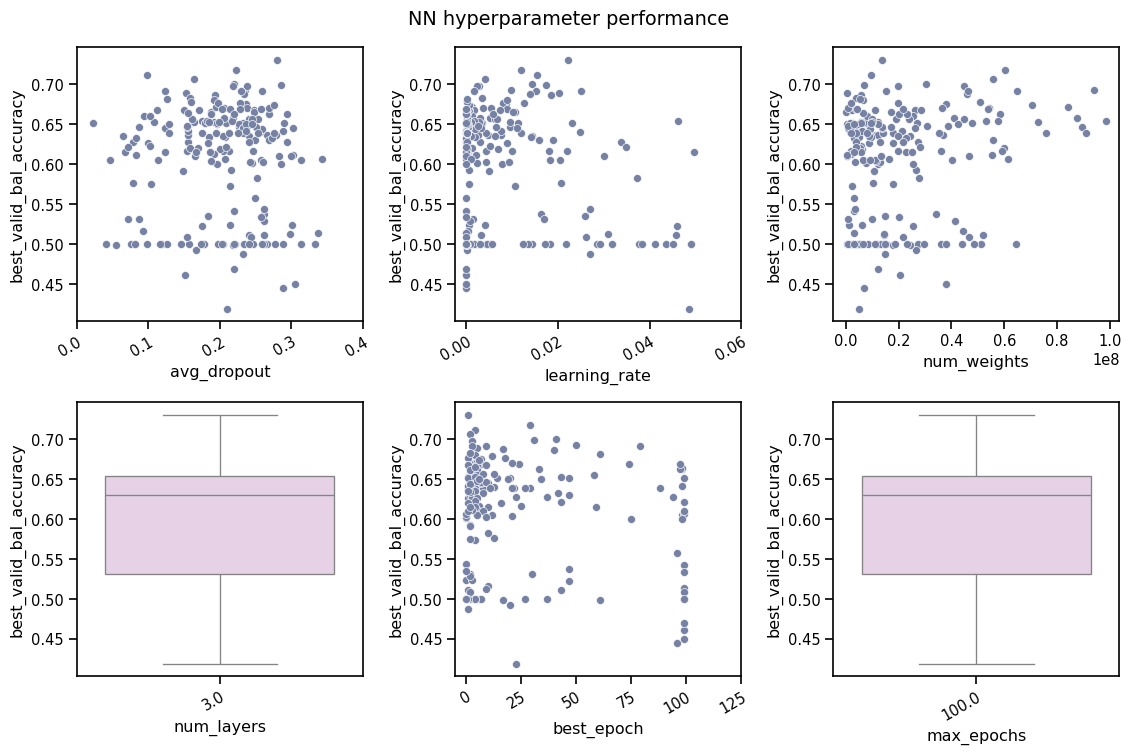

In [18]:
from atomsci.ddm.pipeline import hyper_perf_plots as hpp
import importlib
importlib.reload(hpp)
hpp.plot_hyper_perf(stm, scoretype='bal_accuracy', subset='valid', model_type="NN")

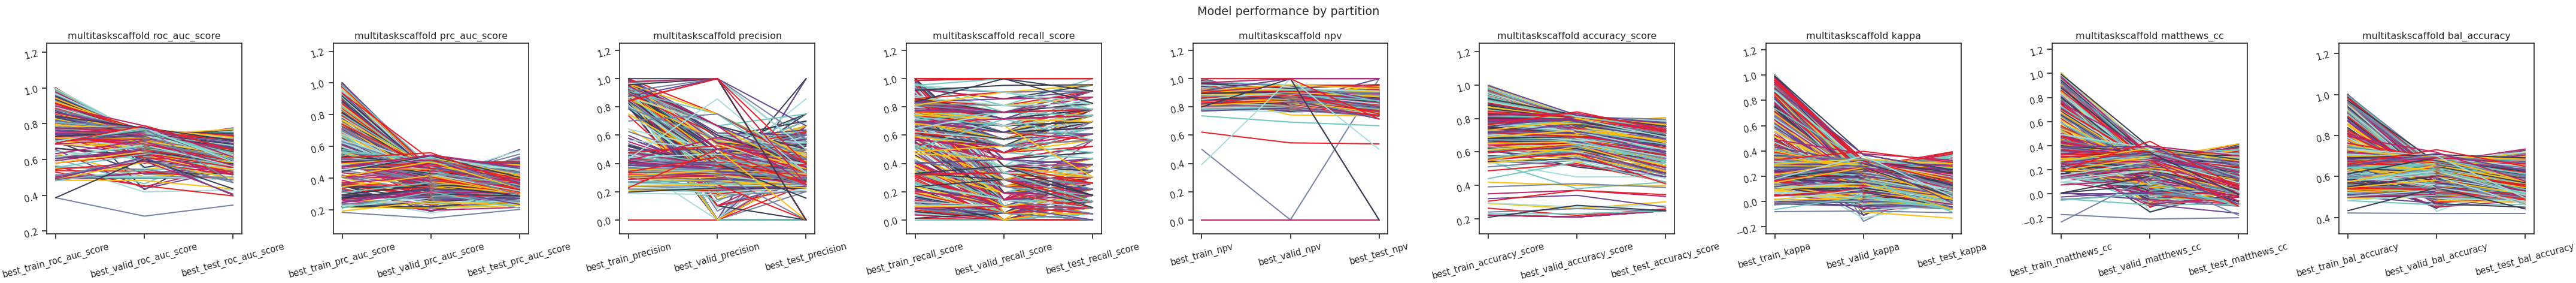

In [19]:
hpp.plot_train_valid_test_scores(stm, prediction_type=pred_type)

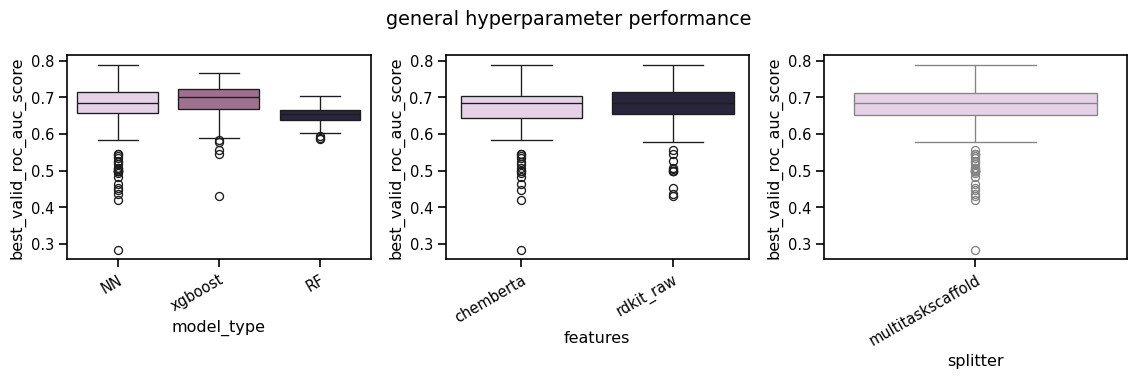

In [20]:
importlib.reload(hpp)
hpp.plot_hyper_perf(stm, scoretype='roc_auc_score', model_type='general')

# model predictions

In [21]:
stm[['model_uuid','model_type', 'response_cols','weight_transform_type',
                    'splitter','features','best_valid_roc_auc_score','best_test_roc_auc_score','model_parameters_dict','feat_parameters_dict','model_path']].head(5)

,model_uuid,model_type,response_cols,weight_transform_type,splitter,features,best_valid_roc_auc_score,best_test_roc_auc_score,model_parameters_dict,feat_parameters_dict,model_path
961,24e47ce7-4bd2-4d75-8eb0-3d9a582d11fd,NN,active_MMP,balancing,multitaskscaffold,chemberta,0.789632,0.651863,"{'batch_size': 50, 'best_epoch': 13, 'bias_ini...",NaN,./MT_models/cell_health_MT_model_24e47ce7-4bd2...
257,d23749e4-bb04-4d06-8274-e27f6b75aae6,NN,active_MMP,balancing,multitaskscaffold,rdkit_raw,0.788427,0.614286,"{'batch_size': 50, 'best_epoch': 29, 'bias_ini...",NaN,./MT_models/cell_health_MT_model_d23749e4-bb04...
753,9f5585ab-4736-400d-9abe-2944709ebf6b,NN,active_MMP,balancing,multitaskscaffold,chemberta,0.777577,0.660248,"{'batch_size': 50, 'best_epoch': 1, 'bias_init...",NaN,./MT_models/cell_health_MT_model_9f5585ab-4736...
729,4ca52895-6b29-4c82-b40d-eea8e453b063,NN,active_MMP,balancing,multitaskscaffold,rdkit_raw,0.776974,0.707453,"{'batch_size': 50, 'best_epoch': 50, 'bias_ini...",NaN,./MT_models/cell_health_MT_model_4ca52895-6b29...
745,49664dde-c5af-4c01-90c7-24e2d240a2d6,NN,active_MMP,None,multitaskscaffold,rdkit_raw,0.776371,0.586335,"{'batch_size': 50, 'best_epoch': 5, 'bias_init...",NaN,./MT_models/cell_health_MT/NN_computed_descrip...


In [22]:
# %debug
from atomsci.ddm.pipeline import predict_from_model as pfm
import os
import pandas as pd
importlib.reload(pfm)

model_uuid=stm.iloc[1].model_uuid
MT_dataset_key='/Users/apaulson/repos/DILI/datasets/scaled_descriptors/cell_health_MT_with_rdkit_raw_descriptors.csv'
input_df=pd.read_csv(MT_dataset_key)
response_cols='active_MMP,active_CellCount,active_MitoStruct,active_ROS,active_GSH,active_NucMask,active_NucArea'.split(',')
response_cols=stm.iloc[1].response_cols

model_file=[os.path.join(root,x) for root, dirs, files in os.walk('./') for x in files if model_uuid in x and "tar.gz" in x][0]
# model_file="./MT_models/cell_health_MT_model_a3abee61-d6ac-4ca5-8630-e0d4174cabf1.tar.gz"

pred_df=pfm.predict_from_model_file(model_path=model_file, 
                            input_df=input_df, id_col='compound_id', 
                            smiles_col='base_rdkit_smiles', 
                            response_col=None,
                            is_featurized=True, dont_standardize=True)


2024-11-22 17:08:54,432 ./MT_models/cell_health_MT_model_d23749e4-bb04-4d06-8274-e27f6b75aae6.tar.gz, 1.6.1
2024-11-22 17:08:54,433 Version compatible check: ./MT_models/cell_health_MT_model_d23749e4-bb04-4d06-8274-e27f6b75aae6.tar.gz version = "1.6", AMPL version = "1.6"
2024-11-22 17:08:54,511 Formatting already featurized data...
2024-11-22 17:08:54,515 Done


['/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/tmpdi_gq7zv/best_model/checkpoint1.pt']
/var/folders/h1/vdxppln90rb2qskbcxvx3m5c0000gn/T/tmpdi_gq7zv/best_model/checkpoint1.pt


/Users/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:240: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


In [23]:
# %debug
pred_df

,compound_id,base_rdkit_smiles,active_MMP,active_CellCount,active_MitoStruct,active_ROS,active_GSH,active_NucMask,active_NucArea,MaxEStateIndex,...,active_MitoStruct_prob,active_MitoStruct_pred,active_ROS_prob,active_ROS_pred,active_GSH_prob,active_GSH_pred,active_NucMask_prob,active_NucMask_pred,active_NucArea_prob,active_NucArea_pred
0,SPID347,COc1cc(NC(C)CCCN)c2ncccc2c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.632987,...,3.506826e-01,0,2.087346e-01,0,1.404233e-01,0,1.665794e-01,0,2.266787e-01,0
1,SPID255,COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1[C@@H](NC...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.730244,...,5.704910e-01,1,5.886398e-01,1,5.081784e-01,1,5.654482e-01,1,5.772861e-01,1
2,SPID125,CN(C)c1cc2c(Nc3ccc4c(cnn4Cc4ccccc4)c3)ncnc2cn1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.899260,...,5.771365e-01,1,6.177439e-01,1,5.463982e-01,1,6.207628e-01,1,6.037567e-01,1
3,SPID431,COc1ccccc1Oc1c(NS(=O)(=O)c2ccc(C(C)(C)C)cc2)nc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.638105,...,5.704910e-01,1,5.886398e-01,1,5.081784e-01,1,5.654482e-01,1,5.772861e-01,1
4,SPID356,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.390339,...,1.637897e-01,0,2.541030e-01,0,1.247088e-01,0,1.943642e-01,0,1.669381e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,SPID302,C[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O)[C@@H](O...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.561862,...,5.704910e-01,1,5.886398e-01,1,5.081784e-01,1,5.654482e-01,1,5.772861e-01,1
574,SPID493,C=C1[C@H](CO)[C@@H](O)C[C@@H]1n1cnc2c(=O)[nH]c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.539890,...,6.510473e-04,0,3.551192e-03,0,1.083932e-03,0,2.750758e-03,0,8.113744e-04,0
575,SPID160,C[C@@H]1NC(C)(C)CO[C@@]1(O)c1cccc(Cl)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.722395,...,8.479622e-09,0,6.949521e-08,0,5.635864e-08,0,7.414282e-08,0,9.751370e-09,0
576,SPID362,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.790799,...,8.080588e-05,0,7.005502e-04,0,1.527932e-04,0,4.900740e-04,0,1.041746e-04,0


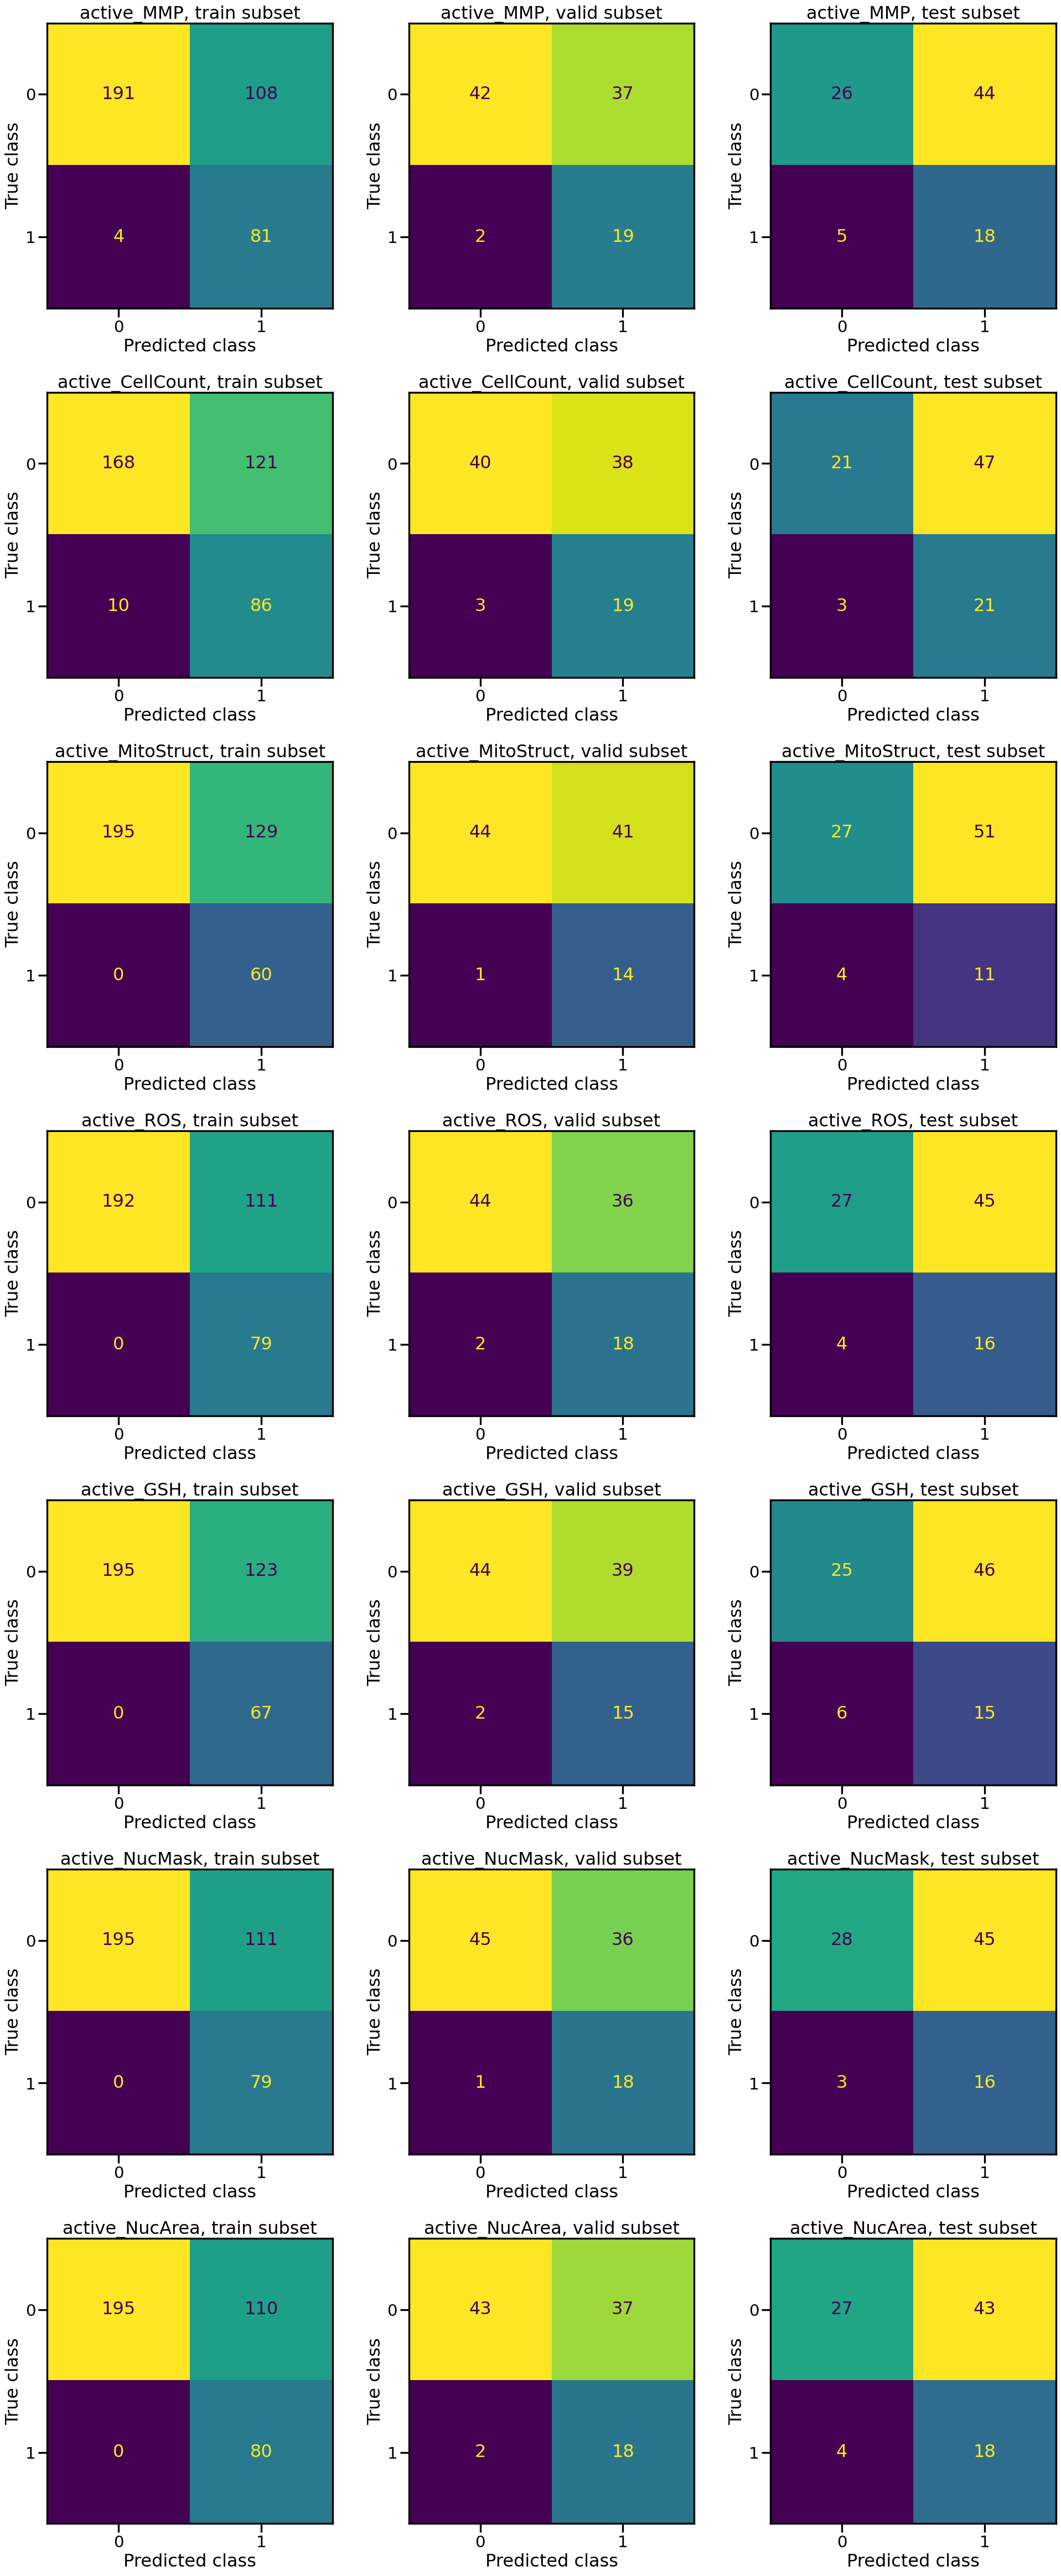

In [24]:
from atomsci.ddm.pipeline import perf_plots as pp

pp.plot_confusion_matrices(model_file)

In [25]:
mtm[mtm.model_uuid==model_uuid].model_path.iloc[0]

'./MT_models/cell_health_MT_model_d23749e4-bb04-4d06-8274-e27f6b75aae6.tar.gz'

# correlation between tasks

In [26]:
import pandas as pd
import seaborn as sns

In [27]:
mt=pd.read_csv('../datasets/cell_health_MT.csv')
mt

,compound_id,base_rdkit_smiles,active_MMP,active_CellCount,active_MitoStruct,active_ROS,active_GSH,active_NucMask,active_NucArea
0,SPID10,CC(C)NCC(O)c1ccc(O)c(O)c1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SPID101,CC(C)CNc1nc(-c2ccc(S(C)(=O)=O)cc2)cc(C(F)(F)F)n1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SPID102,CN1CCN(c2cccc3nc(CN(C)[C@H]4CCCc5cccnc54)c(CO)...,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,SPID103,O=c1ccc2c(-c3ccc(F)cc3F)nc(NC(CO)CO)nc2n1-c1c(...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SPID108,CC(C)Oc1ncc(-c2nc(-c3cccc4c3ccn4CCCC(=O)O)no2)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
573,SPID94,CCn1ncc2c(NC3CCOCC3)c(-c3nnc(Cc4sc(C)nc4C)o3)c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,SPID97,N#Cc1ccc(N(CC(N)=O)CC(F)(F)F)cc1C(F)(F)F,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575,SPID366,CCC1=C(C)CN(C(=O)NCCc2ccc(S(=O)(=O)NC(=O)NC3CC...,1.0,1.0,1.0,1.0,1.0,1.0,1.0
576,SPID444,CCOC(=O)C1=C(COCCN)NC(C)=C(C(=O)OC)C1c1ccccc1Cl,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
mt=mt.set_index(['compound_id','base_rdkit_smiles'])


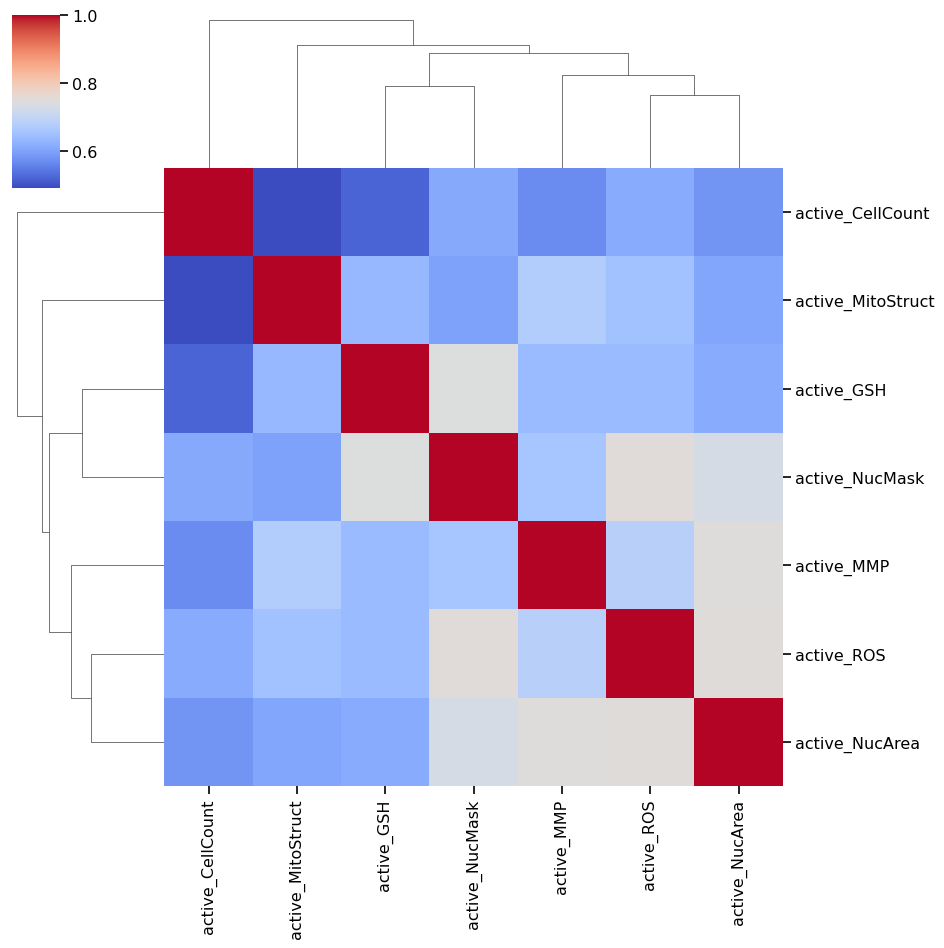

In [29]:
sns.clustermap(mt.corr(method='pearson'), cmap='coolwarm', metric='euclidean', method='complete')

In [30]:
mt.corr()

,active_MMP,active_CellCount,active_MitoStruct,active_ROS,active_GSH,active_NucMask,active_NucArea
active_MMP,1.000000,0.569791,0.675016,0.681945,0.639329,0.658325,0.749486
active_CellCount,0.569791,1.000000,0.493929,0.613777,0.523087,0.612507,0.581132
active_MitoStruct,0.675016,0.493929,1.000000,0.650425,0.635995,0.599775,0.604943
active_ROS,0.681945,0.613777,0.650425,1.000000,0.639175,0.753283,0.751654
active_GSH,0.639329,0.523087,0.635995,0.639175,1.000000,0.745284,0.613834
active_NucMask,0.658325,0.612507,0.599775,0.753283,0.745284,1.000000,0.731158
active_NucArea,0.749486,0.581132,0.604943,0.751654,0.613834,0.731158,1.000000
